In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
%matplotlib inline

In [2]:
sns.distplot(winlistDFdrop["quality"])

NameError: name 'winlistDFdrop' is not defined

## Exploring the data: Univariate

1. There are 12 variables
2. 1599 rows of data in each of the 12 columns
3. All of them are continues, except for quality which can only take the interger value of 1 to 10.
4. below
5. No missing data
6. below

In [2]:
winlistDF = pd.read_csv("winequality-red.csv", sep=";")

winlistDF.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [53]:
#save the column names
names = winlistDF.columns

# Normalize the data so that all variables have a mean of 0 and standard deviation
# of 1.
winlistDF = pd.DataFrame(preprocessing.scale(winlistDF), columns=names)

# Lookit all those matching means and standard deviations!
print(winlistDF.describe())

       fixed acidity  volatile acidity   citric acid  residual sugar  \
count   1.599000e+03      1.599000e+03  1.599000e+03    1.599000e+03   
mean   -1.527511e-17     -8.956771e-17  4.549207e-16   -8.241618e-17   
std     1.000313e+00      1.000313e+00  1.000313e+00    1.000313e+00   
min    -2.137045e+00     -2.278280e+00 -1.391472e+00   -1.162696e+00   
25%    -7.007187e-01     -7.699311e-01 -9.293181e-01   -4.532184e-01   
50%    -2.410944e-01     -4.368911e-02 -5.636026e-02   -2.403750e-01   
75%     5.057952e-01      6.266881e-01  7.652471e-01    4.341614e-02   
max     4.355149e+00      5.877976e+00  3.743574e+00    9.195681e+00   

          chlorides  free sulfur dioxide  total sulfur dioxide       density  \
count  1.599000e+03         1.599000e+03          1.599000e+03  1.599000e+03   
mean   8.658212e-17         1.610136e-16          1.093039e-16  5.182429e-16   
std    1.000313e+00         1.000313e+00          1.000313e+00  1.000313e+00   
min   -1.603945e+00        -1.4

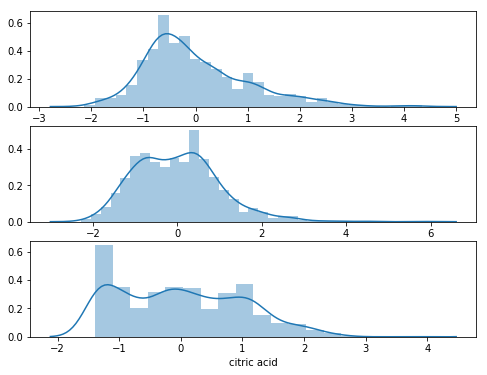

In [66]:
f, (ax1, ax2, ax3) = plt.subplots(3, figsize=(8,6))
sns.distplot(winlistDF["fixed acidity"], ax=ax1)
sns.distplot(winlistDF["volatile acidity"], ax=ax2)
sns.distplot(winlistDF["citric acid"], ax=ax3)
#sns.distplot(np.log10(winlistDF["citric acid"]).dropna(), ax=ax3)

In [27]:
WinVar = pd.DataFrame.var(winlistDF)
WinVar

fixed acidity           1.000626
volatile acidity        1.000626
citric acid             1.000626
residual sugar          1.000626
chlorides               1.000626
free sulfur dioxide     1.000626
total sulfur dioxide    1.000626
density                 1.000626
pH                      1.000626
sulphates               1.000626
alcohol                 1.000626
quality                 1.000626
dtype: float64

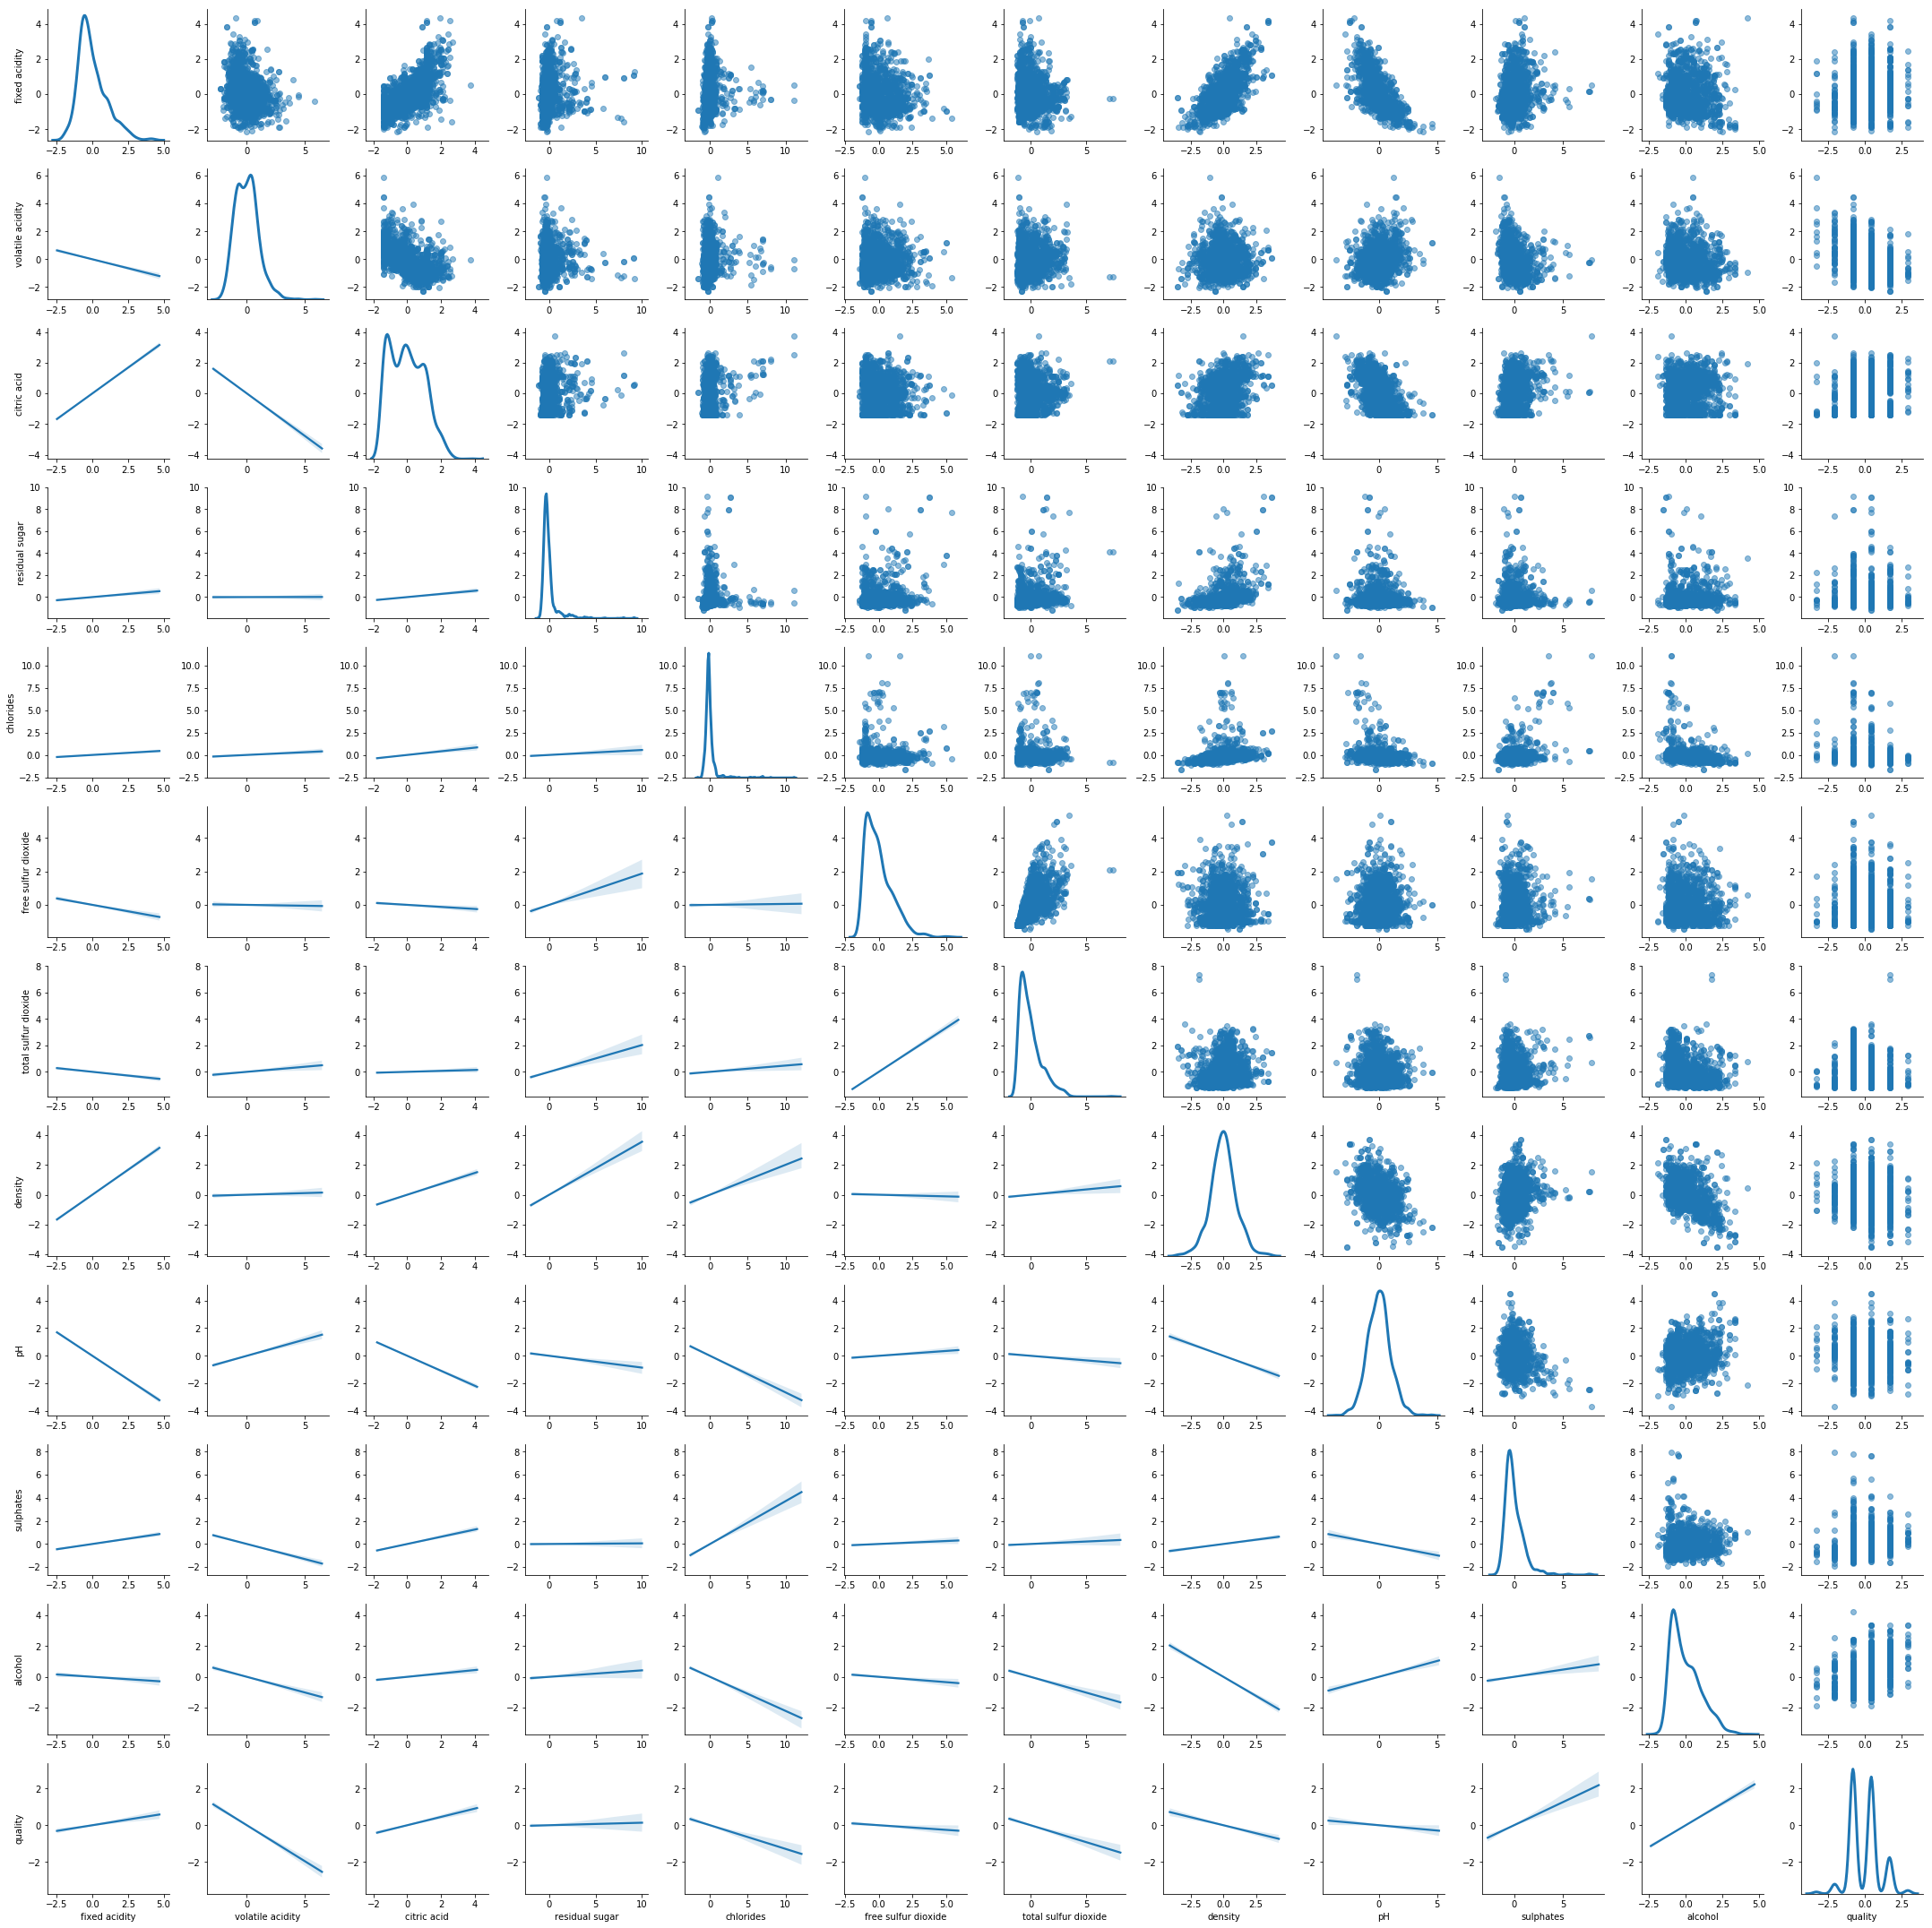

In [28]:
# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(winlistDF, diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

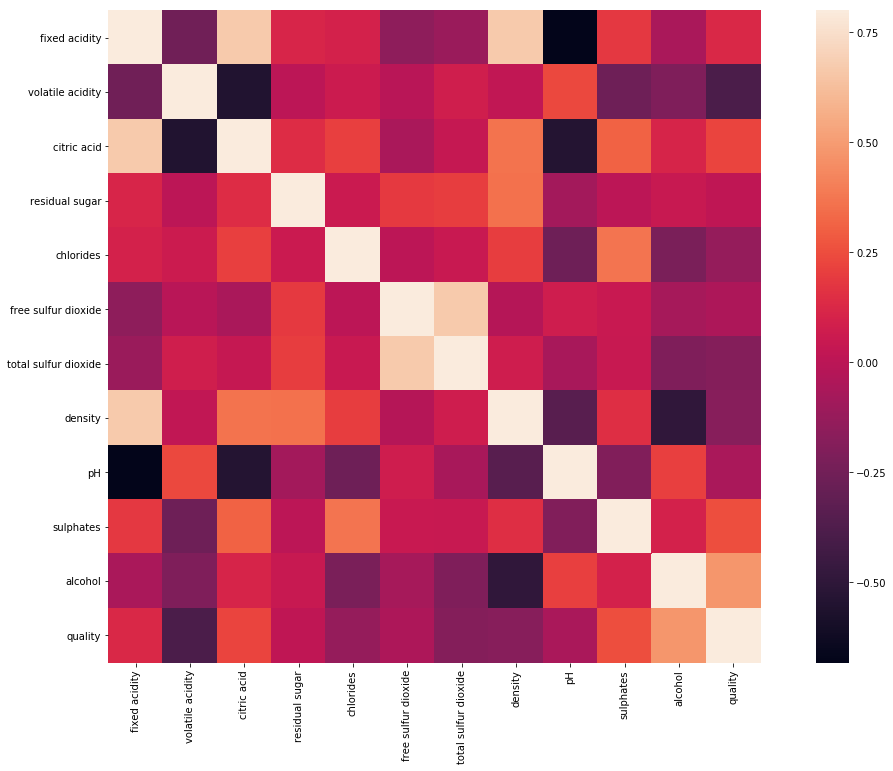

In [29]:
# Make the correlation matrix.
corrmat = winlistDF.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(20, 12))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

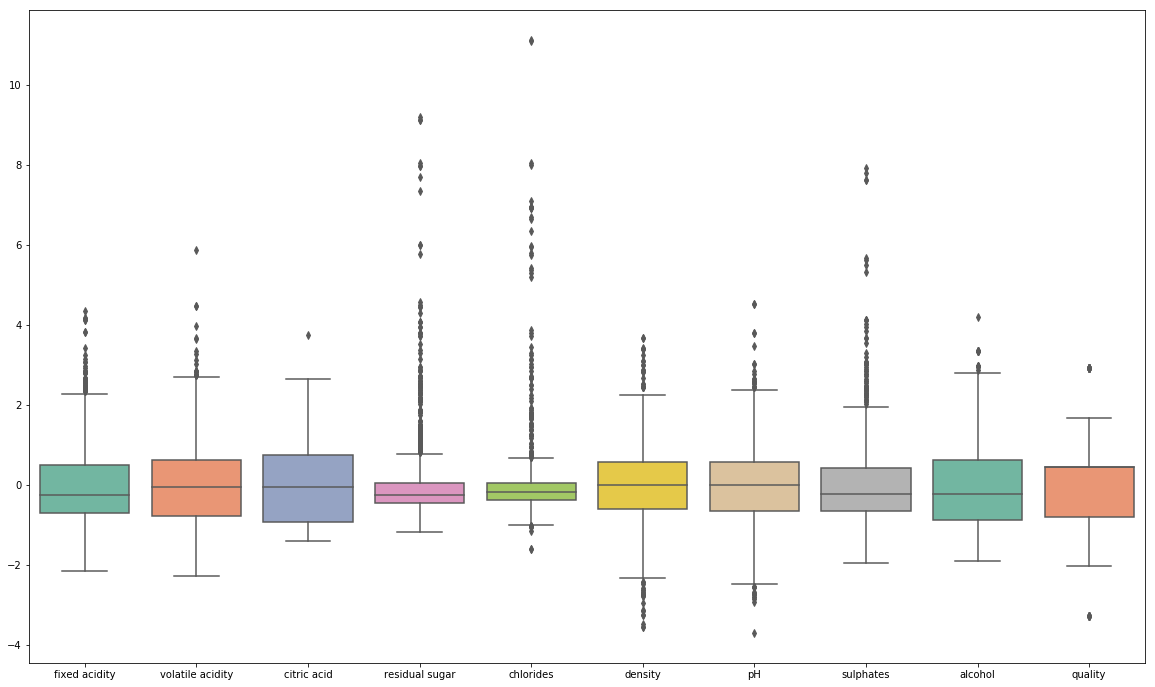

In [30]:
winlistdroped = winlistDF.drop(labels=["free sulfur dioxide", "total sulfur dioxide"], axis=1)
f, ax = plt.subplots(figsize=(20, 12))
ax = sns.boxplot(data=winlistdroped, orient="v", palette="Set2")

# Droping redundun variables

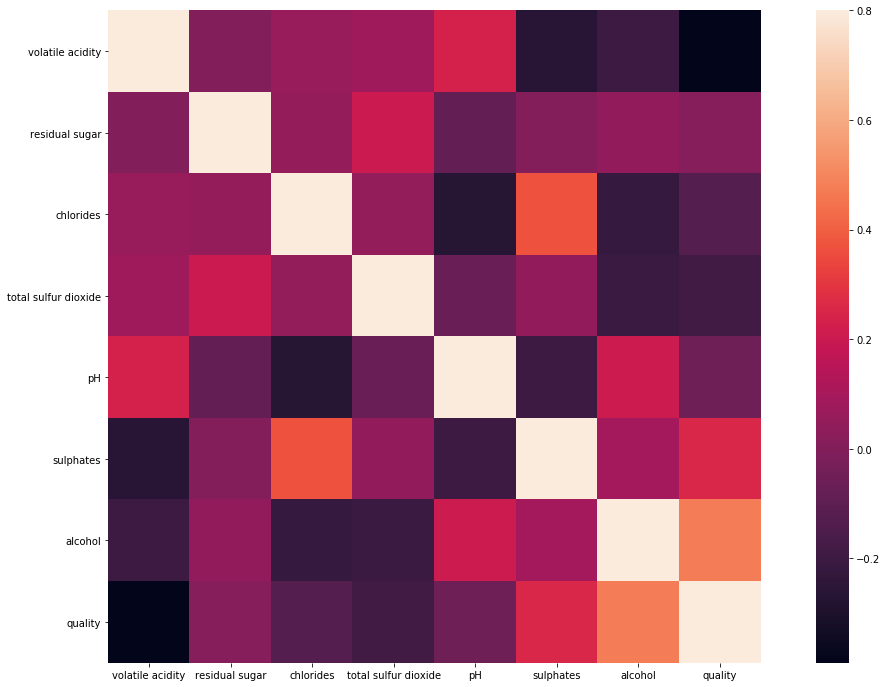

In [34]:
winlistDFdrop = winlistDF.drop(labels=["free sulfur dioxide", "citric acid", "density", "fixed acidity"], axis=1)
# Make the correlation matrix.
corrmat = winlistDFdrop.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(20, 12))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

# Averaging variables and creating features

In [69]:
features = pd.DataFrame()
#meanwinlistDF = winlistDF.drop(labels=["citric acid", "fixed acidity", "density", "free sulfur dioxide", "total sulfur dioxide"], axis=1)
Winmeans = winlistDF[["citric acid", "fixed acidity"]].mean(axis=0)
features['combChem'] = (winlistDF[["citric acid", "fixed acidity"]]).mean(axis=1)

# Check how well the composite correlates with each of the individual variables.
plotdf = winlistDF.loc[:, ["citric acid", "fixed acidity"]]
plotdf['combChem'] = features['combChem'] 

corrmat2 = plotdf.corr()

print(corrmat2)

               citric acid  fixed acidity  combChem
citric acid       1.000000       0.671703  0.914249
fixed acidity     0.671703       1.000000  0.914249
combChem          0.914249       0.914249  1.000000


In [70]:
#meanwinlistDF = winlistDF.drop(labels=["citric acid", "fixed acidity", "density", "free sulfur dioxide", "total sulfur dioxide"], axis=1)
Winmeans = winlistDF[["free sulfur dioxide", "total sulfur dioxide"]].mean(axis=0)
Winstds = winlistDF[["free sulfur dioxide", "total sulfur dioxide"]].std(axis=0)
features['sulfurcomb'] = (winlistDF[["free sulfur dioxide", "total sulfur dioxide"]]).mean(axis=1)

# Check how well the composite correlates with each of the individual variables.
plotdf = winlistDF.loc[:, ["free sulfur dioxide", "total sulfur dioxide"]]
plotdf['sulfurcomb'] = features['sulfurcomb'] 

corrmat2 = plotdf.corr()

print(corrmat2)

                      free sulfur dioxide  total sulfur dioxide  sulfurcomb
free sulfur dioxide              1.000000              0.667666    0.913145
total sulfur dioxide             0.667666              1.000000    0.913145
sulfurcomb                       0.913145              0.913145    1.000000


In [73]:
winlistDF2 = winlistDF.loc[:, ['volatile acidity', 'residual sugar', 'chlorides', 'sulphates', 'alcohol', 'quality', "density", 'pH']]
winlistDF2['combChem'] = features['combChem']
winlistDF2['sulfurcomb'] = features['sulfurcomb']

corrmat2 = winlistDF2.corr()
print(corrmat2)

                  volatile acidity  residual sugar  chlorides  sulphates  \
volatile acidity          1.000000        0.001918   0.061298  -0.260987   
residual sugar            0.001918        1.000000   0.055610   0.005527   
chlorides                 0.061298        0.055610   1.000000   0.371260   
sulphates                -0.260987        0.005527   0.371260   1.000000   
alcohol                  -0.202288        0.042075  -0.221141   0.093595   
quality                  -0.390558        0.013732  -0.128907   0.251397   
density                   0.022026        0.355283   0.200632   0.148506   
pH                        0.234937       -0.085652  -0.265026  -0.196648   
combChem                 -0.442235        0.141293   0.162717   0.271138   
sulfurcomb                0.036120        0.213590   0.029000   0.051801   

                   alcohol   quality   density        pH  combChem  sulfurcomb  
volatile acidity -0.202288 -0.390558  0.022026  0.234937 -0.442235    0.036120  
r

In [74]:
print(winlistDF2.describe())
winlistDF2.head(2)

       volatile acidity  residual sugar     chlorides     sulphates  \
count      1.599000e+03    1.599000e+03  1.599000e+03  1.599000e+03   
mean      -8.956771e-17   -8.241618e-17  8.658212e-17  9.211609e-17   
std        1.000313e+00    1.000313e+00  1.000313e+00  1.000313e+00   
min       -2.278280e+00   -1.162696e+00 -1.603945e+00 -1.936507e+00   
25%       -7.699311e-01   -4.532184e-01 -3.712290e-01 -6.382196e-01   
50%       -4.368911e-02   -2.403750e-01 -1.799455e-01 -2.251281e-01   
75%        6.266881e-01    4.341614e-02  5.384542e-02  4.240158e-01   
max        5.877976e+00    9.195681e+00  1.112703e+01  7.918677e+00   

            alcohol       quality       density            pH      combChem  \
count  1.599000e+03  1.599000e+03  1.599000e+03  1.599000e+03  1.599000e+03   
mean   9.226169e-16 -8.130526e-16  5.182429e-16 -2.129490e-16  2.721748e-17   
std    1.000313e+00  1.000313e+00  1.000313e+00  1.000313e+00  9.145353e-01   
min   -1.898919e+00 -3.265165e+00 -3.538731e

,volatile acidity,residual sugar,chlorides,sulphates,alcohol,quality,density,pH,combChem,sulfurcomb
0,0.961877,-0.453218,-0.243707,-0.579207,-0.960246,-0.787823,0.558274,1.288643,-0.959916,-0.422663
1,1.967442,0.043416,0.223875,0.128950,-0.584777,-0.787823,0.028261,-0.719933,-0.845010,0.748501


do it from the beginning